# Задача
В этой работе вам предлагается решить задачу регрессии, а именно построить алгоритм, определяющий качество вина на основе физико-химических тестов:
 - fixed acidity
 - volatile acidity
 - citric acid
 - residual sugar
 - chlorides
 - free sulfur dioxide
 - total sulfur dioxide
 - density
 - pH
 - sulphates
 - alcohol 
 
Более подробно про признаки можно почитать [здесь](https://archive.ics.uci.edu/ml/datasets/wine+quality). Целевой признак записан в переменной *quality*.

В этой задаче для обучения будут использовать 2 алгоритма:
- [DecisonTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

# Решение

Загрузите набор данных *winequality-red.csv* с помощью `pandas` (скачать можно [здесь](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv), или с помощью скрипта ниже). Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [237]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
# your code here

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df_wine = pd.read_csv('winequality-red.csv', delimiter=';')
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [150]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Анализ и предобработка данных

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
1. Проверьте есть ли в данных пропущенные значения. Удалите из выборки все объекты с пропусками и дубликаты.
2. Выделите 70% выборки для обучения и дальнейшего анализа.
3. Проанализируйте признаки и по необходимости предобработайте их. Все шаги предобработки поясните текстом.
4. Целевую переменную (ту, которую мы хотим предсказывать) можно выделить в отдельную переменную (НЕ забудьте удалить ее из датасета, когда будете обучать модель).

1) Проверка наличия пропущенных значений и дубликатов.

In [21]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
print('количество пропущенных значений')
df_wine.isna().sum()

количество пропущенных значений


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Пропущенных значений нет

In [243]:
dup=df_wine.duplicated()
dup_count = dup.sum()
df = df_wine.drop_duplicates()
print('Количество полных дубликатов, которые были удалены: ', dup_count )


Количество полных дубликатов, которые были удалены:  240


2) Анализ признаков и их преообработка.

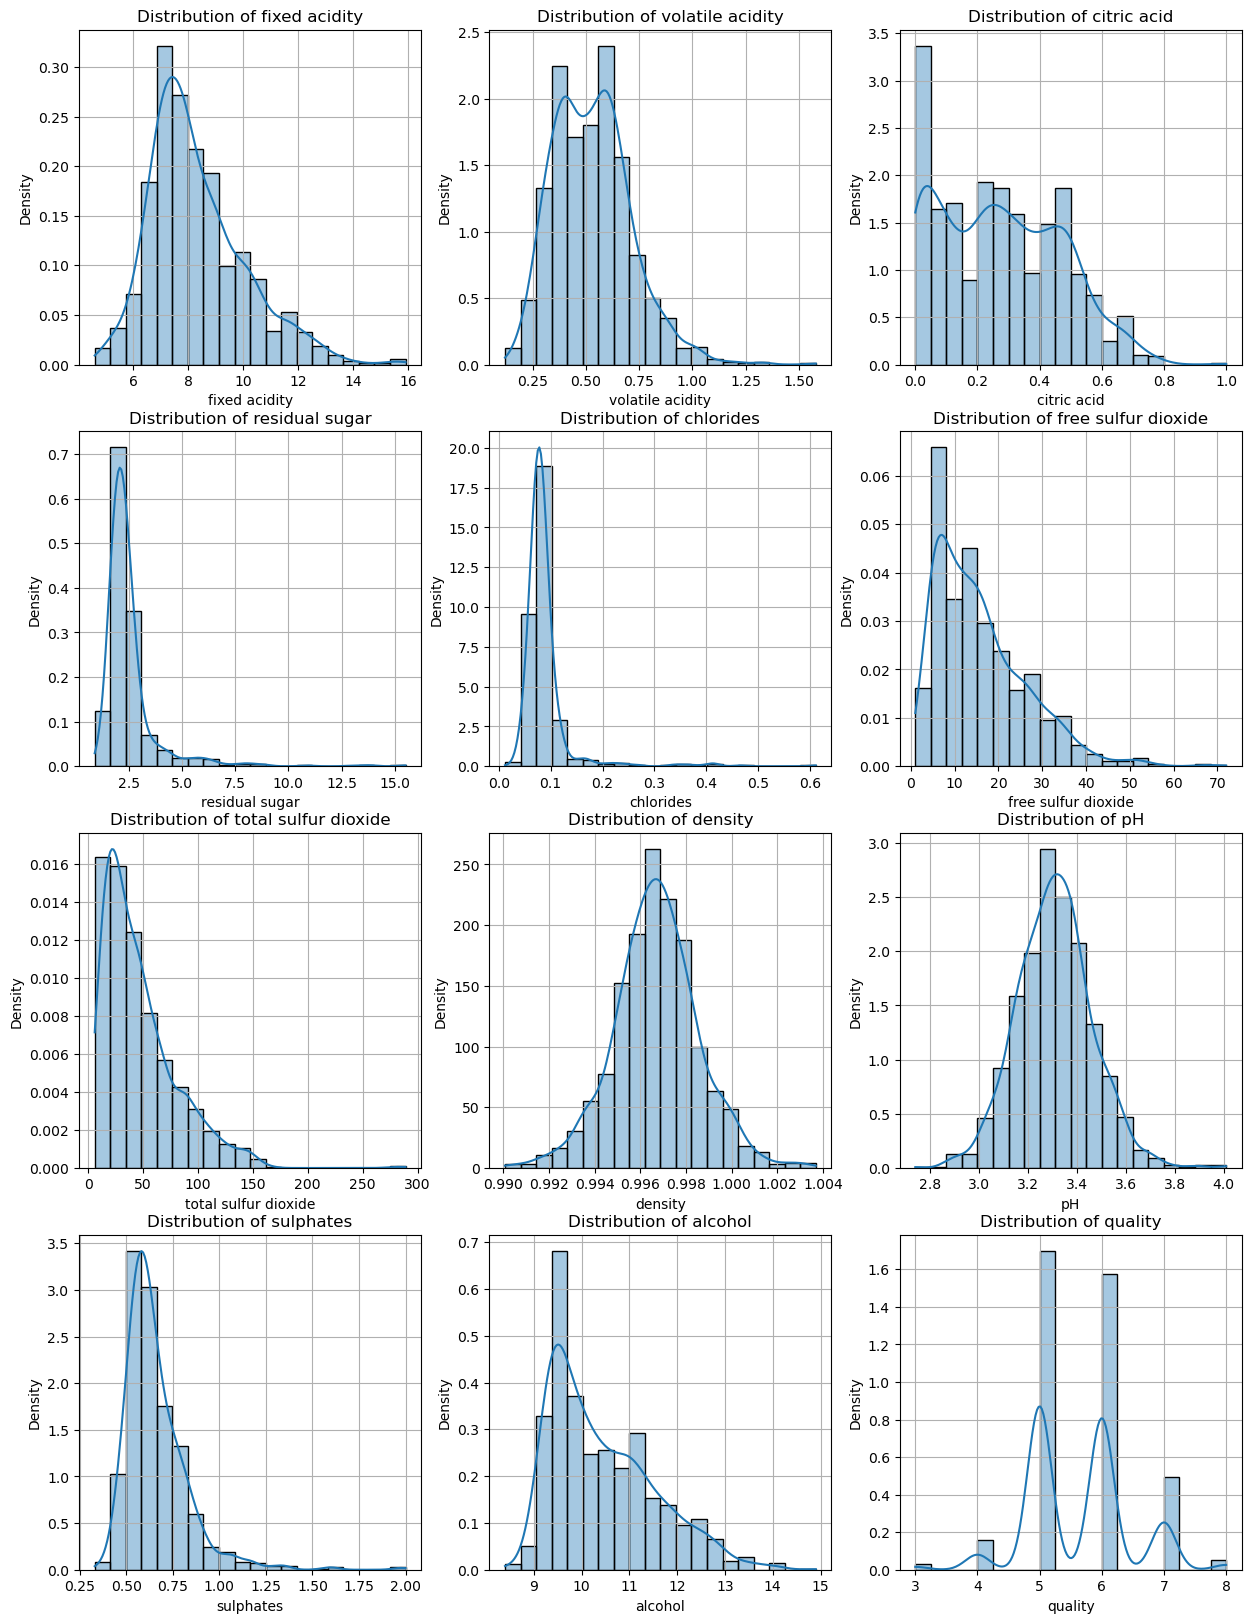

In [4]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
#добавить отсупы между строками графиков 
axes = axes.flatten()  
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=20, kde=True, alpha=0.4, stat='density', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].grid(True)
plt.show()

Визуализация признаков в виде гистограммы показывает распределение значений признаков.
Нормальные распределения: density, pH. Распределение целевого признака (quality) имеет две моды, следовательно, можно разделить quality на две группы('bad' и 'good' - вино плохого и хорошего качества.
Нормальные распределения, имеющие смещение вершины распределение влево:  free sulfur dioxide, fixed acidity, alcohol, citric (среднее значение больше чем медиана). 


In [6]:
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None

#bins = [2, 6, 8]
#group_names = ['bad', 'good']
#df['quality'] = pd.cut(x=df['quality'], bins=bins, labels = group_names) 

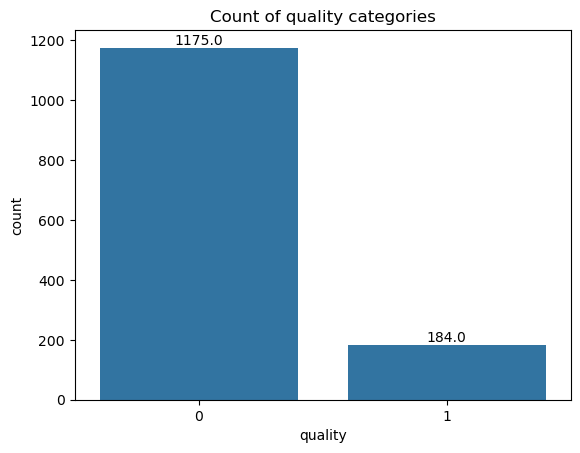

In [7]:
#label_quality = LabelEncoder()
#df['quality'] = label_quality.fit_transform(df['quality'])
#ax=sns.countplot(x='quality', data=df)
#for p in ax.patches:
#    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),  ha='center', va='bottom')
#plt.title('Count of quality categories')
#plt.show()

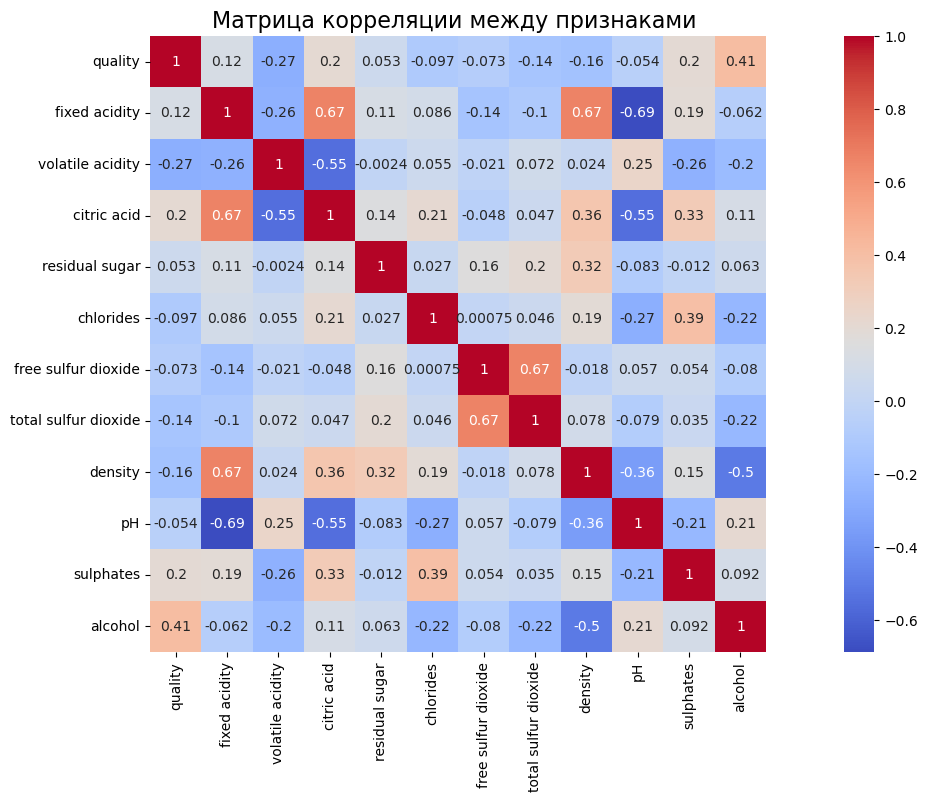

In [9]:
feature_list=['quality', 'fixed acidity', 'volatile acidity','citric acid', 'residual sugar','chlorides', 'free sulfur dioxide','total sulfur dioxide', 
                'density', 'pH', 'sulphates', 'alcohol']
f, ax = plt.subplots(figsize=(20, 8))
ax.set_title('Матрица корреляции между признаками ',fontsize=16)
correlation_matrix = df[feature_list].corr()
sns.heatmap(correlation_matrix, annot=True, square=True, ax=ax, cmap='coolwarm');

Сильнее всего связаны free sulfur dioxide и total sulfur dioxide (0.67), удалим total sulfur dioxide. Целевой признак quality имеет наибольшую связь с alcohol (0.48) и sulphates (0.25)


In [13]:
del df['total sulfur dioxide']

3) Выделение 70% выборки для обучения.


In [245]:
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)


## Обучение модели регрессии

Постройте модель регрессии, используя 2 алгоритма:
- [DecisonTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

Для начала используйте гиперпараметры по умолчанию.

Рассчитайте среднее качество кросс-валидации модели как долю дисперсии зависимой переменной (коэффициент детерминации) $R^2$. Каким получилось качество? Какой алгоритм вы бы выбрали для дальнейшей работы? Обоснуйте свой выбор.

In [247]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.preprocessing import StandardScaler

In [249]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [251]:
dt_regressor = DecisionTreeRegressor(random_state=42)
#dt_regressor.fit(X_train, y_train)
#y_pred_train = dt_regressor.predict(X_train)
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
r2s =model_selection.cross_val_score(dt_regressor, X_train, y_train, scoring='r2',  cv=kfold)
print('среднее качество кросс-валидации модели DecisonTree:', round(r2s.mean(), 2), '(std:',  round(r2s.std(),2), ')')


среднее качество кросс-валидации модели DecisonTree: -0.3 (std: 0.25 )


In [253]:
ada_regressor=AdaBoostRegressor(random_state=42)
#ada_regressor.fit(X_train, y_train )
kfold_ada = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
cv_score_ada = model_selection.cross_val_score(ada_regressor, X_train, y_train, cv=kfold_ada, scoring='r2')
print('среднее качество кросс-валидации модели AdaBoostRegressor:', round( cv_score_ada.mean(), 2), '(std:',  round(cv_score_ada.std(),2), ')' )


среднее качество кросс-валидации модели AdaBoostRegressor: 0.3 (std: 0.06 )


Для дальнейшей работы стоит выбрать AdaBoostRegressor, т.к среднее качество кросс-валидации положительно в отличие от модели DecisonTree. Значение среднее качество кросс-валидации близко к нулю , это говорит о необходимости улучшить модель. Стандартное отклонение у модели AdaBoostRegressor также меньше в сравнении с DecisonTree. 


Теперь сделаем подбор оптимальных гиперпараметров. Сделайте поиск по сетке с помощью кросс-валидации. Изменилось ли качество алгоритмов? Почему?

In [257]:
from sklearn.model_selection import GridSearchCV
import time

In [259]:
param_grid = {'n_estimators': [100, 150, 300, 500, 800, 1000, 2000], 'learning_rate': [0.01, 0.1, 1.0], 'random_state':[1]}
grid_search = GridSearchCV(ada_regressor, param_grid, scoring='r2', cv=10, n_jobs=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=42), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [100, 150, 300, 500, 800, 1000, 2000],
                         'random_state': [1]},
             scoring='r2')

In [260]:
print("Лучшие гиперпараметры:", grid_search.best_params_)
print("Лучшее качество R²:", grid_search.best_score_)

Лучшие гиперпараметры: {'learning_rate': 0.01, 'n_estimators': 2000, 'random_state': 1}
Лучшее качество R²: 0.3147026509135805


In [261]:
param_grid_tree = {
    'max_depth': [5,10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(estimator=dt_regressor , param_grid=param_grid_tree,  cv=10, n_jobs=-1, scoring='r2')
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [262]:
print("Лучшие гиперпараметры:", grid_search_tree.best_params_)
print("Лучшее качество R²:", grid_search_tree.best_score_)

Лучшие гиперпараметры: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Лучшее качество R²: 0.19429835161407732


Оцените скорость обучения каждого из алгоритмов. Для этого воспользуйтесь графиком вида "ящик с усами", который отражает среднее время обучения алгоритма при фиксированном значении гиперпараметров. Что вы можете сказать о скорости работы алгоритмов? Почему наблюдаются такие результаты? Можно ли ускорить? Если да, то каким образом?

   DecisionTree  AdaBoostRegressor
0      0.011998          14.377570
1      0.006000          11.156818
2      0.006000          20.105192
3      0.006001          12.765984
4      0.006000          14.602114
5      0.006998          11.265767
6      0.008001          11.036203
7      0.016003          11.970720
8      0.011995          15.247527
9      0.013004          12.318008


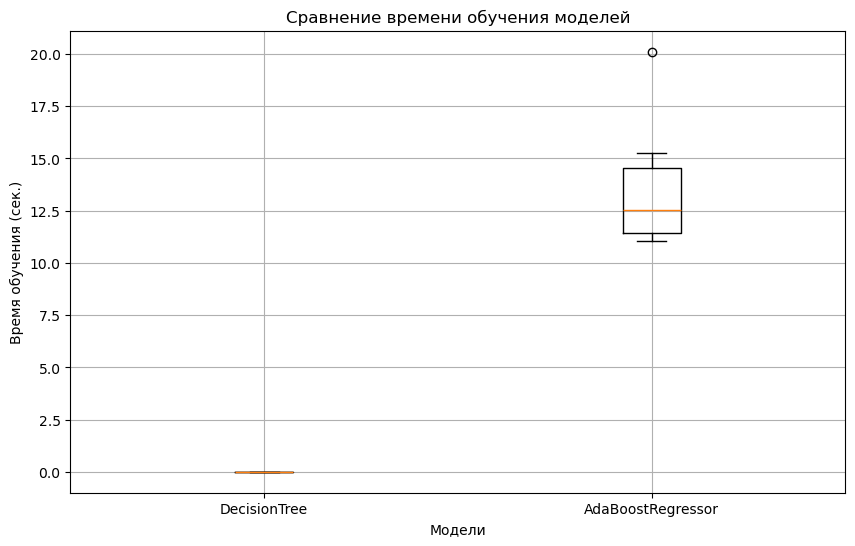

In [274]:
models = {
    'DecisionTree': DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=4),
    'AdaBoostRegressor': AdaBoostRegressor( n_estimators=2000, learning_rate=0.01, random_state=1)
}
training_times = {model_name: [] for model_name in models.keys()}
for model_name, model in models.items():
    for i in range(10): 
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        training_times[model_name].append(end_time - start_time)
        
training_df = pd.DataFrame(training_times)
print(training_df)
plt.figure(figsize=(10, 6))
plt.boxplot(training_df.values, labels=training_df.columns)
plt.title('Сравнение времени обучения моделей')
plt.ylabel('Время обучения (сек.)')
plt.xlabel('Модели')
plt.grid()
plt.show()

## PCA преобразование

Теперь попробуем сделать преобразрование данных с помощью PCA. Выберите оптимальное количество компонент и преобразуйте данные. Объясните свой выбор.

In [265]:
from sklearn.decomposition import PCA

In [ ]:
#Метод объяснённой дисперсии


## Обучение моделей на данных, трансформированных с помощью PCA

Обучим те же классификаторы на трансформированных с помощью PCA данных. Подберите оптимальные значения исследуемых гиперпараметров для новых данных. Какой алгоритм справился лучше? Какой быстрее? Почему?

In [ ]:
# your code here

## Сравнение результатов

Сравните результаты полученные до трансформации данных с помощью PCA и после. Для этого воспользуйтесь "ящиком с усами" (boxplot).

Сделайте общие итоговые выводы о моделях регрессии с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [ ]:
# your code here

## Тестирование всех модели

Протестируйте все построенные модели (в т.ч. с и без PCA трансформации) на данных, которые были отложены для теста (их должно было остаться 30%). Не забудьте про все необходимые преобразования.

In [ ]:
# your code here